In [1]:
using Pkg
Pkg.activate("..")
Pkg.resolve()
Pkg.instantiate()
using JPEC, Plots
# test

  Activating project at `~/Desktop/plasma/JPEC`
  No Changes to `~/Desktop/plasma/JPEC/Project.toml`
  No Changes to `~/Desktop/plasma/JPEC/Manifest.toml`


In [ ]:
### Set equil input parameters
equil_in = JPEC.Equilibrium.EquilInput(
    "sol_test",      # eq_filename
    "sol",           # eq_type
    "hamada",        # jac_type
    0.01,            # psilow
    1.0,             # psihigh
    100,             # mpsi (number of radial grid points)
    128,              # mtheta (number of poloidal grid points)
)

### Set Soloviev input parameters
sol_inputs = JPEC.Equilibrium.SolInput(
    65, # mr
    65, # mz
    64, # ma
    1.0, # elongation
    1.0, # minor radius
    3.0, # r0
    1.26, # q0
    1.0, # p0fac
    1.0, # b0fac
    1.0 # f0fac
    )

JPEC.Equilibrium.EquilibriumTypes.SolInput(65, 65, 64, 1.0, 1.0, 3.0, 1.26, 1.0, 1.0, 1.0)

In [ ]:
### Set up Soloviev equilibrium and generate input splines

directrun_inputs = JPEC.Equilibrium.sol_run(
    equil_in,
    sol_inputs
    )

Generating Soloviev equilibrium inputs with:
  mr=65, mz=65, ma=64
  e=1.0, a=1.0, r0=3.0
  q0=1.26, p0fac=1.0, b0fac=1.0, f0fac=1.0


JPEC.Equilibrium.EquilibriumTypes.DirectRunInput(JPEC.Equilibrium.EquilibriumTypes.EquilInput("sol_test", "sol", "hamada", 0, 0, 0, "ldp", 0.01, 1.0, 100, 128, 0.0), JPEC.SplinesMod.RealSplineType(Ptr{Nothing} @0x00000002c7dca430, [0.0002366863905325444, 0.0009467455621301776, 0.0021301775147928997, 0.0037869822485207105, 0.00591715976331361, 0.008520710059171599, 0.011597633136094675, 0.015147928994082842, 0.019171597633136098, 0.02366863905325444  …  0.7159763313609467, 0.7422485207100592, 0.7689940828402366, 0.7962130177514793, 0.8239053254437869, 0.8520710059171599, 0.8807100591715976, 0.9098224852071007, 0.9394082840236686, 0.9694674556213019], [3.0 0.0699702775404851 0.0 0.0; 3.0 0.06992058274109555 0.0 0.0; … ; 3.0 0.004240622881241524 0.0 0.0; 3.0 0.002136876373750603 0.0 0.0], 63, 4, 3, Matrix{Float64}(undef, 0, 0), [0.0 NaN NaN NaN; 3.1e-322 2.931649544e-314 0.0 2.8902103136e-314; … ; 5.6894032294e-314 0.0 6.068232435e-314 5.845798824e-314; 2.934530927e-314 0.0 2.8734806737e-

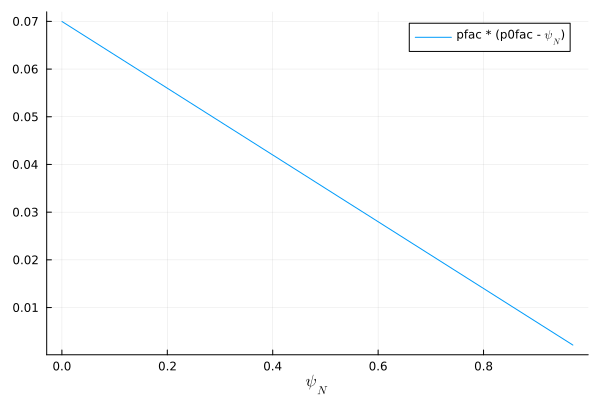

In [26]:
plot(
    directrun_inputs.sq_in.xs,
    directrun_inputs.sq_in.fs[:,2],
    label=raw"pfac * (p0fac - $\psi_N$)",
    xlabel=raw"$\psi_N$"
    )

In [ ]:
### Execute direct_run() and solve equilibrium

plasma_equilibrium = JPEC.Equilibrium.direct_run(
    directrun_inputs
    )

--- Starting Direct Equilibrium Processing ---
Finding magnetic axis...


: 